<a href="https://colab.research.google.com/github/demolakstate/AdeNet-Deep-Learning-Architecture/blob/main/AdeNet_0__damaged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip zero_damaged.zip

In [ ]:
ls

sample_data/  zero_damaged/  zero_damaged.zip


In [ ]:
#imports

import tensorflow as tf

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.layers import Input,GlobalMaxPooling2D,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array,load_img

import numpy as np
from cv2 import resize
from os import path, listdir

In [ ]:
import keras
import keras.layers as layers
from keras.models import Sequential

In [ ]:
# model = Sequential(
#     [
#      #layers.Conv2D(16, (3,3), activation='relu'),
#      layers.Dense(512, activation='relu'),
#      layers.Dense(256, activation='relu'),
#      layers.Dense(2)
     
#     ])

In [ ]:
# model = Sequential(
#     [
#      Input(shape=(400,160, 3)),
#      layers.Conv2D(32, 3, activation='relu'),
#      layers.MaxPooling2D(),
#      layers.Conv2D(64, 3, activation='relu'),
#      layers.MaxPooling2D(),
#      layers.Conv2D(128, 3, activation='relu'),
#      layers.Flatten(),
#      #layers.Conv2D(16, (3,3), activation='relu'),
#      layers.Dense(512, activation='relu'),
#      layers.Dense(256, activation='relu'),
#      layers.Dense(2)
     
#     ])

In [ ]:
#inputs = Input(shape=(None,None,3))

In [ ]:
# def my_model():
#   inputs = keras.Input(shape=(400,400, 3))
#   #inputs = Input(shape=(300,300,3))
#   x = layers.Conv2D(32, 3, padding='valid')(inputs)
#   x = layers.BatchNormalization()(x)
#   x = keras.activations.relu(x)
#   x = layers.MaxPooling2D()(x)
#   x = layers.Conv2D(64, 5, padding='same')(x)
#   #x = layers.GlobalMaxPooling2D()(x)
#   x = layers.BatchNormalization()(x)
#   x = keras.activations.relu(x)
  
#   x = layers.Flatten()(x)
#   x = layers.Dense(64, activation='relu')(x)
  
#   outputs = layers.Dense(2, activation='softmax')(x)
#   model = Input(inputs=inputs, outputs=outputs)


#   return model

In [ ]:
def my_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3)(x)
    x = layers.GlobalMaxPooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(2)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model = my_model()

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=3e-4),
    metrics=["accuracy"],
)

In [ ]:
#model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
#net = GlobalMaxPooling2D()(net.output)
# #outputs = Dense(n_classes,activation='softmax')(net)

# #model = Model(inputs=inputs,outputs=outputs)
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
tf_op_layer_Relu (TensorFlow [(None, 30, 30, 32)]      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)       

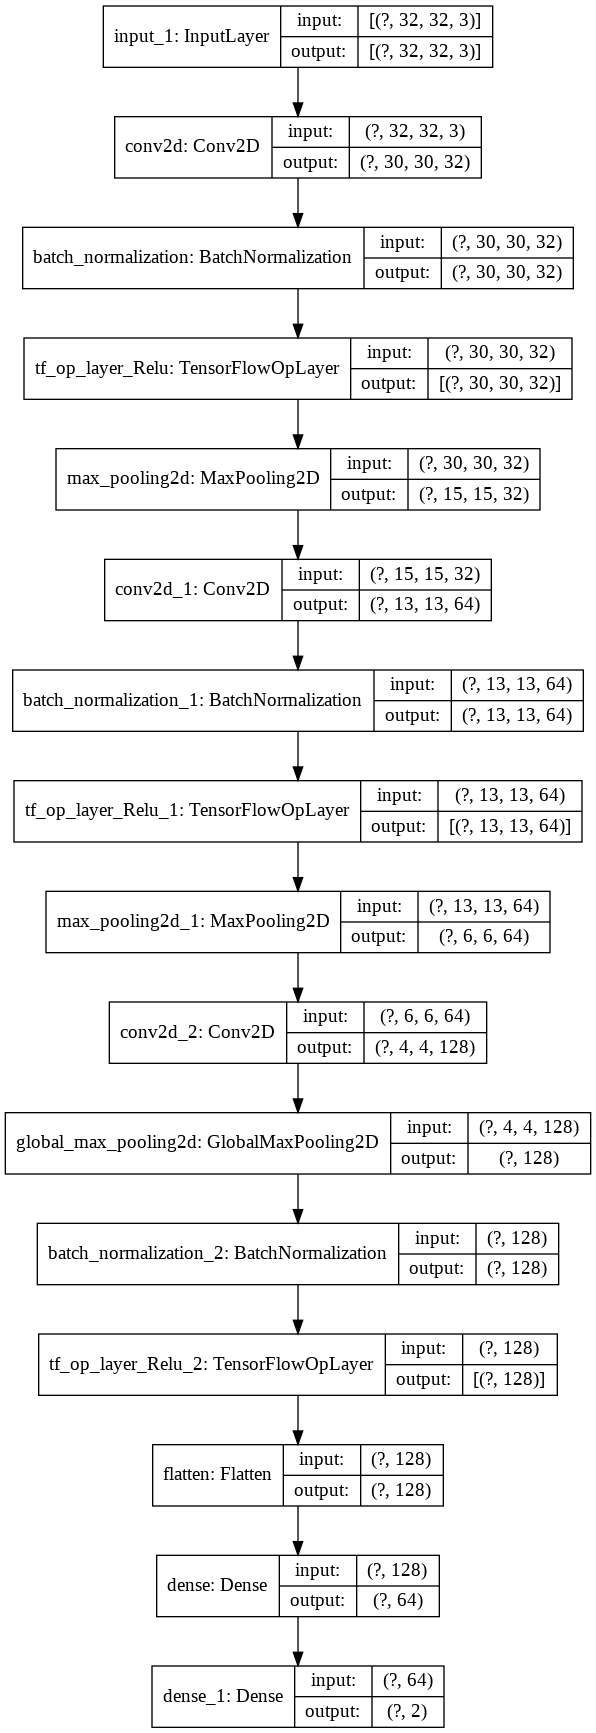

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
# model.compile(
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=keras.optimizers.Adam(lr=0.001),
#     metrics=["accuracy"]
# )

In [ ]:
#model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
n_classes = 2

In [ ]:
# #set up MobileNet GlobalMaxPooling and unsepcified input resolution

# inputs = Input(shape=(None,None,3))


# def model():
#  net = keras.Sequential([layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(512,512,3)), # input_shape=(None,None,3)
#                             layers.AveragePooling2D(),
#                             layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
#                             layers.AveragePooling2D(),
#                             layers.Flatten(),
#                             layers.Dense(units=120, activation='relu'),
#                             layers.Dense(units=84, activation='relu'),
#                             layers.Dense(units=2, activation = 'softmax'),
#                             #layers.GlobalMaxPooling2D()
                            
#                             ])
#  return net



# #net = MobileNetV2(include_top=False, alpha=0.35, weights='imagenet', input_tensor=inputs, classes=n_classes)
# model = model()
# #net = GlobalMaxPooling2D()(net.output)
# #outputs = Dense(n_classes,activation='softmax')(net)

# #model = Model(inputs=inputs,outputs=outputs)
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [ ]:
#set up MobileNet GlobalMaxPooling and unsepcified input resolution

#inputs = Input(shape=(None,None,3))


# def model(inputs):
#  net = keras.Sequential([layers.InputLayer(input_tensor=inputs),
#                          layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu'), # input_shape=(None,None,3)
#                             layers.AveragePooling2D(),
#                             layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
#                             layers.AveragePooling2D(),
#                             layers.Flatten(),
#                             layers.Dense(units=120, activation='relu'),
#                             layers.Dense(units=84, activation='relu'),
#                             layers.Dense(units=10, activation = 'softmax'),
#                             #layers.GlobalMaxPooling2D()
                            
#                             ])
#  return net



# net = keras.Sequential([layers.InputLayer(input_tensor=inputs),
#                          layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)), # input_shape=(None,None,3)
#                             layers.AveragePooling2D(),
#                             layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
#                             #layers.GlobalMaxPooling2D(),
#                             layers.AveragePooling2D(),
#                             layers.Flatten(),
#                             layers.Dense(units=120, activation='relu'),
#                             layers.Dense(units=84, activation='relu'),
#                             layers.Dense(units=10, activation = 'softmax'),
#                             #layers.GlobalMaxPooling2D()
                            
#                             ])








#net = MobileNetV2(include_top=False, alpha=0.35, weights='imagenet', input_tensor=inputs, classes=n_classes)
#net = model(inputs)
#net = GlobalMaxPooling2D()(net.output)




In [ ]:
#net.summary()

In [ ]:
#net.trainable = False

In [ ]:
#net.summary()

In [ ]:
#x = net(inputs, training=False)

In [ ]:
# x = layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu')(x)
# x = layers.AveragePooling2D()(x)
# x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(x)
# x = layers.AveragePooling2D()(x)

In [ ]:
#x = layers.GlobalAveragePooling2D()(x)

In [ ]:
#x = layers.Flatten()(x)

In [ ]:
#x = layers.Dense(120)(x)

In [ ]:
#x = layers.Dense(84)(x)

In [ ]:
#outputs = layers.Dense(2)(x)

In [ ]:
#model = Model(inputs, outputs)

In [ ]:
#model.summary()

In [ ]:
#model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
#model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['binary_accuracy'])

In [ ]:
#data generator class; yields batches of data for training/testing
class ImageGenerator():

    def __init__(self, directory, batch_size=16, shuffle=False, max_dimension=None):        
        
        self.directories = directory
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.max_dimension = max_dimension
        
        self.image_paths = []
        self.class_labels = []
        
        #create list of image file paths and class target labels
        for class_label, class_dir in enumerate(listdir(directory)):
            self.image_paths += [path.join(directory,class_dir,f) for f in listdir(path.join(directory,class_dir))]
            self.class_labels += [class_label for _ in listdir(path.join(directory,class_dir))]

        self.image_paths = np.array(self.image_paths)
        self.class_labels = np.array(self.class_labels)

        #index array for shuffling data
        self.idx = np.arange(len(self.image_paths))
        
    
    def __len__(self):
        
        #number of batches in an epoch
        return int(np.ceil(len(self.image_paths)/float(self.batch_size)))
    
    
    def _load_image(self,img_path):
        
        #load image from path and convert to array
        img = load_img(img_path, color_mode='rgb', interpolation='nearest')
        img = img_to_array(img)
        
        #downsample image if above allowed size if specified
        max_dim = max(img.shape) 
        if self.max_dimension:
            if max_dim > self.max_dimension:
                new_dim = tuple(d*self.max_dimension//max_dim for d in img.shape[1::-1])
                img = resize(img, new_dim)
            
        #scale image values
        img = preprocess_input(img)

        return img
    
    
    def _pad_images(self,img,shape):
        #pad images to match largest image in batch
        img = np.pad(img,(*[((shape[i]-img.shape[i])//2,
                    ((shape[i]-img.shape[i])//2) + ((shape[i]-img.shape[i])%2)) for i in range(2)],
                          (0,0)),mode='constant',constant_values=0.)
        
        return img


    def __call__(self):
        #shuffle index
        if self.shuffle:
            np.random.shuffle(self.idx)
        
        #generate batches
        for batch in range(len(self)):

            batch_image_paths = self.image_paths[self.idx[batch*self.batch_size:(batch+1)*self.batch_size]]
            batch_class_labels = self.class_labels[self.idx[batch*self.batch_size:(batch+1)*self.batch_size]]

            batch_images = [self._load_image(image_path) for image_path in batch_image_paths]

            max_resolution = tuple(max([img.shape[i] for img in batch_images]) for i in range(2))
            batch_images = np.array([self._pad_images(image,max_resolution) for image in batch_images])

            yield batch_images, batch_class_labels

In [ ]:
#model.load_weights('insulators-v24.h5')

In [ ]:
#initialize our generators; specifying data directories, batch size, and dimension threshold

train_image_directory = 'zero_damaged/train'
test_image_directory = 'zero_damaged/validation'

n_classes = 10
batch_size = 16
max_dimension = 512

#create generators for training and generating

train_generator = ImageGenerator(train_image_directory, batch_size=batch_size, shuffle=True, max_dimension=max_dimension)
test_generator = ImageGenerator(test_image_directory, batch_size=batch_size, max_dimension=max_dimension)

#convert generators into tf.data.Dataset objects for optimization with keras model fit method

train_dataset = tf.data.Dataset.from_generator(train_generator,
     (tf.float32, tf.int32),
    (tf.TensorShape([None,None,None,3]), tf.TensorShape([None])))

test_dataset = tf.data.Dataset.from_generator(test_generator,
     (tf.float32, tf.int32),
    (tf.TensorShape([None,None,None,3]), tf.TensorShape([None])))


#train and evaluate model
history = model.fit(train_dataset,validation_data=test_dataset,epochs=20,verbose=1,workers=2,max_queue_size=20)

Epoch 1/20
142/142 [==============================] - 88s 622ms/step - loss: 0.0645 - accuracy: 0.9947 - val_loss: 0.6590 - val_accuracy: 0.6663
Epoch 2/20
142/142 [==============================] - 74s 522ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.7538 - val_accuracy: 0.6663
Epoch 3/20
142/142 [==============================] - 69s 484ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.3390 - val_accuracy: 0.6663
Epoch 4/20
142/142 [==============================] - 64s 450ms/step - loss: 9.5683e-04 - accuracy: 1.0000 - val_loss: 1.9009 - val_accuracy: 0.6663
Epoch 5/20
142/142 [==============================] - 64s 447ms/step - loss: 5.7096e-04 - accuracy: 1.0000 - val_loss: 2.6978 - val_accuracy: 0.6663
Epoch 6/20
142/142 [==============================] - 62s 435ms/step - loss: 3.3559e-04 - accuracy: 1.0000 - val_loss: 3.3734 - val_accuracy: 0.6663
Epoch 7/20
142/142 [==============================] - 57s 404ms/step - loss: 2.5136e-04 - accuracy: 1.0000 - val_loss:

In [ ]:
#history = model.fit(train_dataset,validation_data=test_dataset,epochs=2,verbose=1)

In [ ]:
#history = model.fit(train_dataset,validation_data=test_dataset,epochs=2,verbose=1)

In [ ]:
# Save the entire model to a HDF5 file
model.save('zero_damaged.h5')

Visualize

In [ ]:
import matplotlib.pyplot as plt

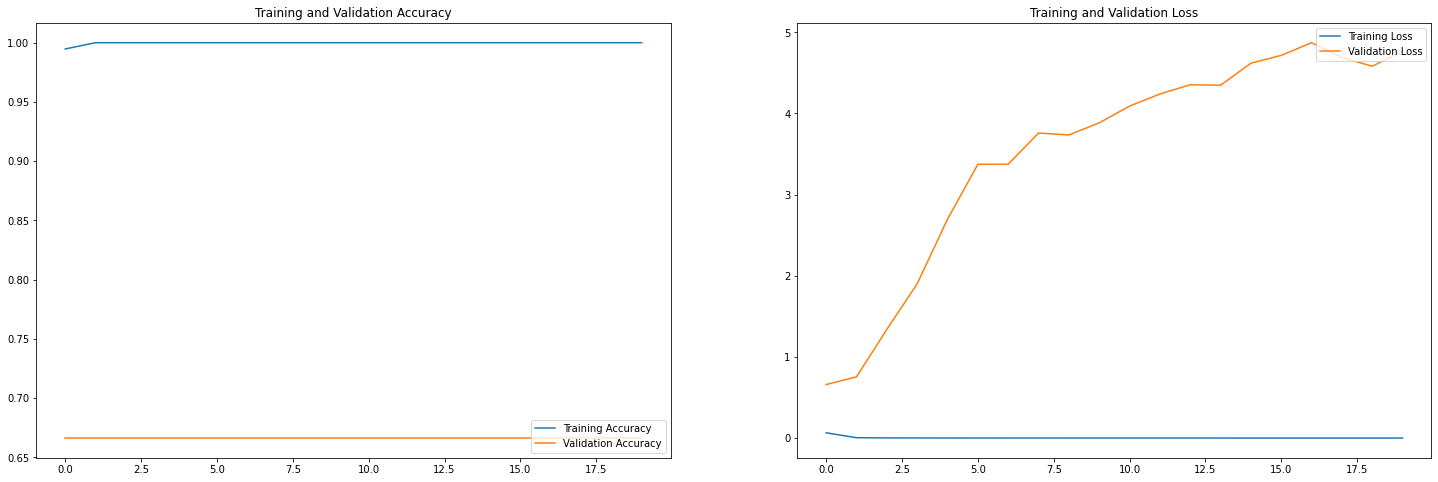

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(12)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)


#plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')


plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# acc = history.history['sparse_categorical_accuracy']
# val_acc = history.history['val_sparse_categorical_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(12)

# plt.figure(figsize=(25, 8))
# plt.subplot(1, 2, 1)


# #plt.plot(epochs_range, acc, label='Training Accuracy')
# #plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')


# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# #plt.plot(epochs_range, loss, label='Training Loss')
# #plt.plot(epochs_range, val_loss, label='Validation Loss')


# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')

# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

Evaluation

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_dataset, verbose=0)

#test_loss, test_acc = model.evaluate_generator(test_data_gen, verbose=0)

print('\nTest accuracy:', test_acc)



print('\nTest accuracy:', test_acc)

print('\nTest loss:', test_loss)













Instructions for updating:
Please use Model.evaluate, which supports generators.

Test accuracy: 0.6662749648094177

Test accuracy: 0.6662749648094177

Test loss: 4.76680850982666


In [ ]:
## Make predictions on test data ##

### Let's make predictions on some images ###

test_generator.class_labels

predictions = model.predict_generator(test_dataset)

true_labels = test_generator.class_labels

predictions[0]

np.argmax(predictions[0])

test_generator.class_labels[0]

predictions[-1]

np.argmax(predictions[-1])

test_generator.class_labels[-1]



#test_dataset.classes

Instructions for updating:
Please use Model.predict, which supports generators.


1

In [ ]:
type(test_dataset)


tensorflow.python.data.ops.dataset_ops.FlatMapDataset

In [ ]:
#test_generator.image_paths

In [ ]:
test_generator.class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

[[  0 284]
 [  0 567]]


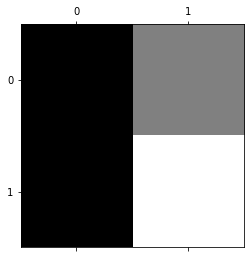

In [ ]:
## Confusion Matrix ##

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])

y_pred





cm = confusion_matrix(y_true, y_pred)

print(cm)



plt.matshow(cm, cmap=plt.cm.gray)
plt.show()

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names = ['undamaged', 'damaged']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   undamaged       0.00      0.00      0.00       284
     damaged       0.67      1.00      0.80       567

    accuracy                           0.67       851
   macro avg       0.33      0.50      0.40       851
weighted avg       0.44      0.67      0.53       851



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.5


In [ ]:
#train and evaluate model
#model.fit(train_dataset,epochs=10,verbose=1,workers=2,max_queue_size=20)